# Deutsch–Jozsa problem
This notebook is a part of [01_Hello_quantum](https://pres.writ3it.tech/01_hello_quantum/01_hello_quantum.html) presentation.

### General quantum algorithm
(source: wikipedia.org)
<img src="https://upload.wikimedia.org/wikipedia/commons/b/b5/Deutsch-Jozsa-algorithm-quantum-circuit.png" alt="Drawing" style="width: 600px;"/>


### Step 1. Check Qiskit installation

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

### Step 2. Imports

In [2]:
from qiskit import(
  QuantumCircuit,
  QuantumRegister,
  ClassicalRegister,
  execute,
  Aer)
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import plot_histogram
from qiskit import IBMQ

### Step 3. Make Quantum Circuit

In [3]:
data_qubits = QuantumRegister(4, 'data')
helper_qubits = QuantumRegister(1, 'help')
output_bits = ClassicalRegister(4, 'out')

dj_circuit = QuantumCircuit(data_qubits,helper_qubits,output_bits) 

# Step 1. Initialization

## superposition from 0-state
dj_circuit.h(data_qubits) 

## superposition from 1-state
dj_circuit.x(helper_qubits) 
dj_circuit.h(helper_qubits)


dj_circuit.barrier(data_qubits,helper_qubits)

# Step 2. Uf implementation
dj_circuit.cx(data_qubits[0], helper_qubits[0])

dj_circuit.barrier(data_qubits,helper_qubits)

# Step 3. Hadamard
dj_circuit.h(data_qubits) 


# Step 4. Measurment
dj_circuit.measure(data_qubits, output_bits)

# draw
dj_circuit.draw()

### Step 4. Create machine (simulator) & execute

Interpretation of the result:
- |0000> - constant
- |other> - balanced

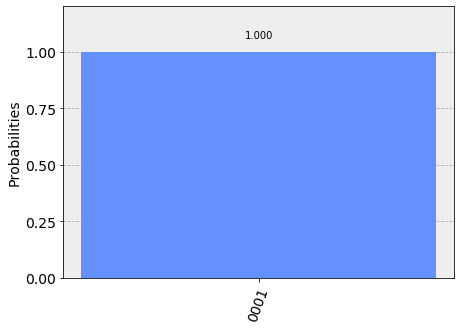

In [4]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(dj_circuit, simulator, shots=1)
result = job.result()
counts = result.get_counts(dj_circuit)
plot_histogram(counts)

### Step 5. Execute in IBMQ

In [5]:
# provide access token
IBMQ.enable_account('token')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

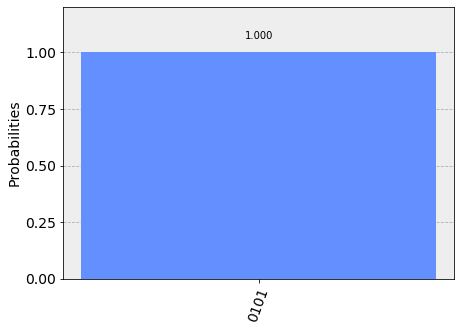

In [6]:
provider = IBMQ.get_provider()
backend = provider.get_backend('ibmq_burlington')
job = execute(dj_circuit, backend, shots=1)
result = job.result()
counts = result.get_counts(dj_circuit)
plot_histogram(counts)